In [28]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '0'
from keras.models import load_model
from vis.utils import utils
from keras import activations
import glob
from PIL import Image
import pandas as pd

from vis.visualization import visualize_saliency, overlay
from vis.utils import utils
from keras import activations
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.cm as cm
from vis.visualization import visualize_cam
from tqdm import tqdm
from keras.applications.mobilenetv2 import MobileNetV2, preprocess_input

In [60]:
model = load_model("../models/dataset-1/Comparaison_2/Mobilnet_real-mixgan_n8_3/best_model_epoch.hdf5")

In [3]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu

In [4]:
df = pd.read_csv("train.csv")
imgs = df[df["label"] == 1]
imgs = imgs[imgs["zoom"] == "400X"]

In [69]:
model.layers[-1].activation = activations.linear
model = utils.apply_modifications(model)

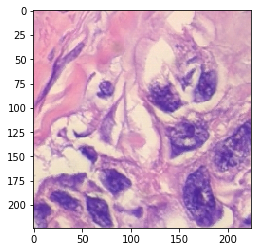

In [71]:
# img1 = utils.load_img("data/original/all/"+list(imgs['name'])[15], target_size=(224, 224))
img1 = Image.open("data/original/all/"+list(imgs['name'])[15]).crop((120, 0, 580, 460)).resize((224,224))
img_norm = preprocess_input(np.array(img1).astype(np.float32))
# img_norm = img1*(1/255)
plt.imshow(img1)

In [65]:
layers_name = [m.name for m in model.layers if "relu" in m.name]
layers_idx = [k for k,m in enumerate(model.layers) if "relu" in m.name]

layers_name_2 = [m for idx, m in enumerate(layers_name) if idx % 10 == 0]

In [72]:
plot_heat = []
for i,lname in tqdm(enumerate(layers_name)):
    layer_idx = utils.find_layer_idx(model, lname)
    grads = visualize_cam(model, layer_idx, filter_indices=None, seed_input=img_norm)
    plot_heat.append(grads)

35it [02:22,  4.20s/it]


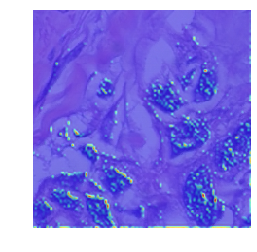

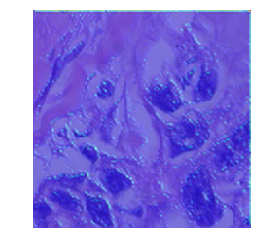

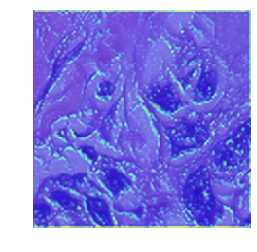

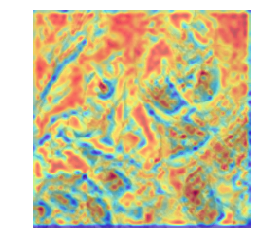

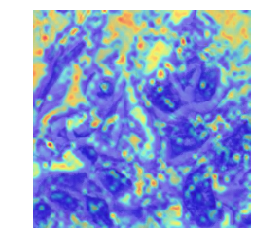

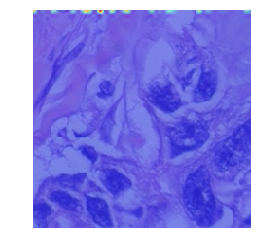

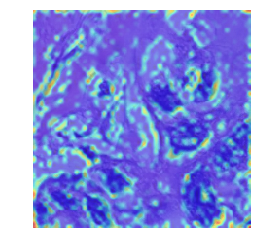

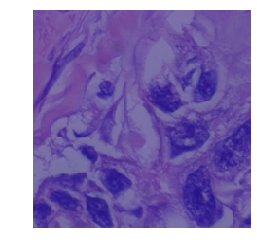

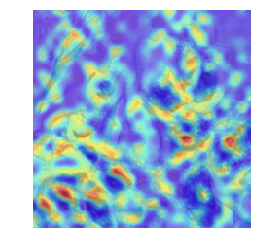

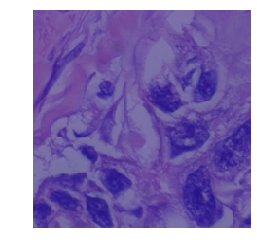

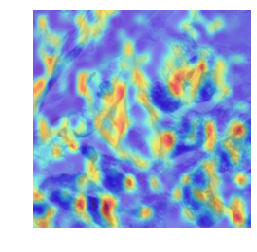

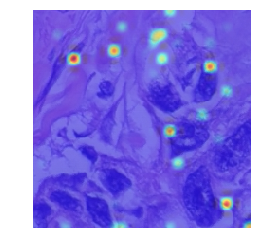

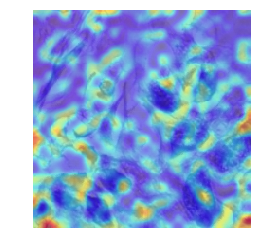

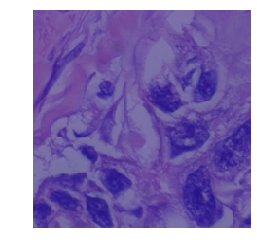

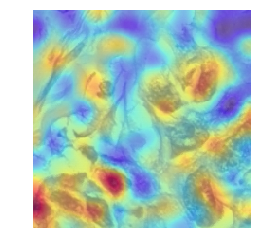

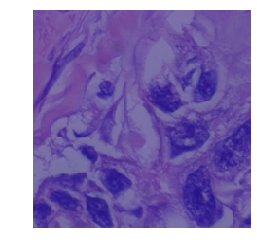

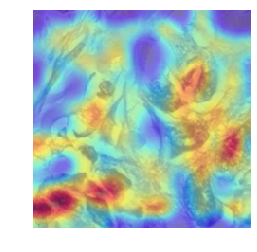

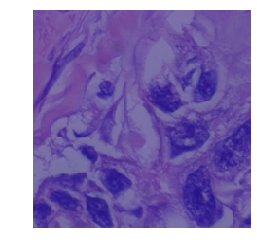

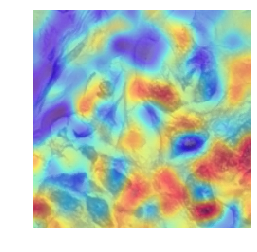

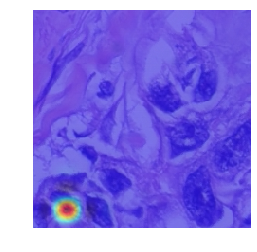

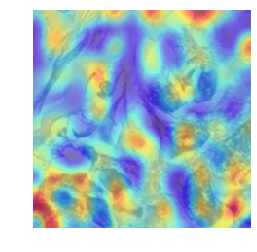

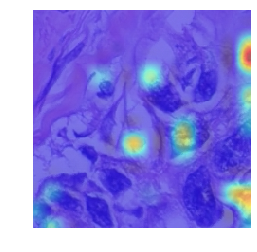

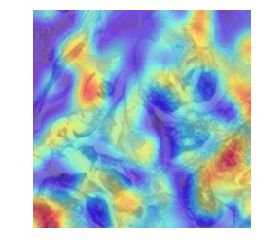

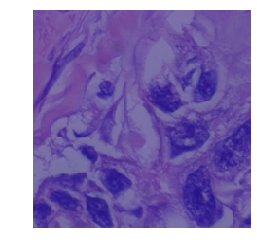

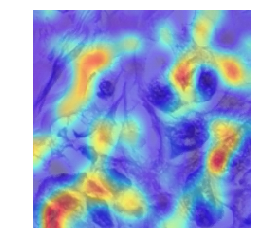

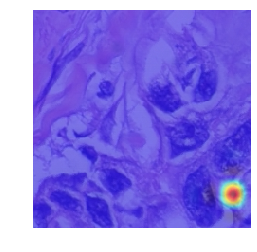

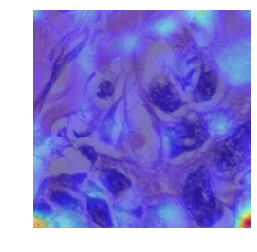

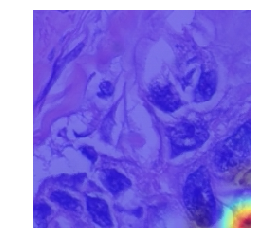

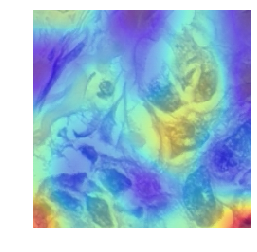

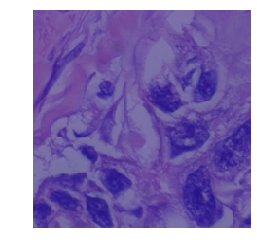

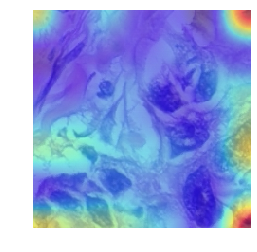

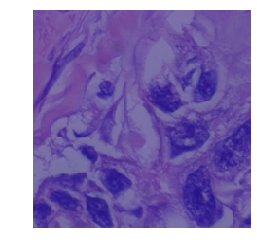

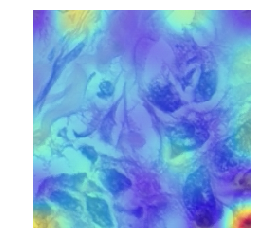

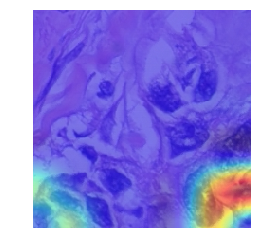

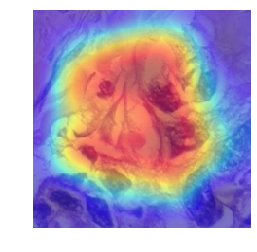

In [74]:
f, ax = plt.subplots(1, 7)
f.set_size_inches(30, 25)
# ax[0].imshow(img1, cmap='jet')
# ax[0].axis('off')
for i, grad in enumerate(plot_heat[0:6]):
    jet_heatmap = np.uint8(cm.jet(grad)[..., :3] * 255)
    ax[i+1].imshow(overlay(jet_heatmap, img1))
    ax[i+1].axis('off')

In [18]:
layer_idx = utils.find_layer_idx(model, layers_name[0])

In [19]:
grads = visualize_saliency(model, layer_idx, filter_indices=None, seed_input=img1)

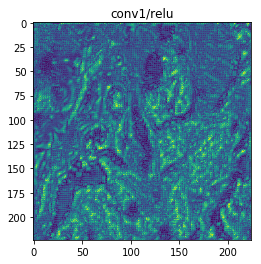

In [22]:
plt.imshow(grads)
plt.title(layers_name[0])
plt.show()

In [51]:
# f, ax = plt.subplots(1, 13)
plot_grags = []
for i,lname in enumerate(layers_name_2):
    layer_idx = utils.find_layer_idx(model, lname)
    grads = visualize_saliency(model, layer_idx, filter_indices=None, seed_input=img1, backprop_modifier="guided")
    plot_grags.append(grads)
#     ax[i].imshow(grads, cmap='jet')
    

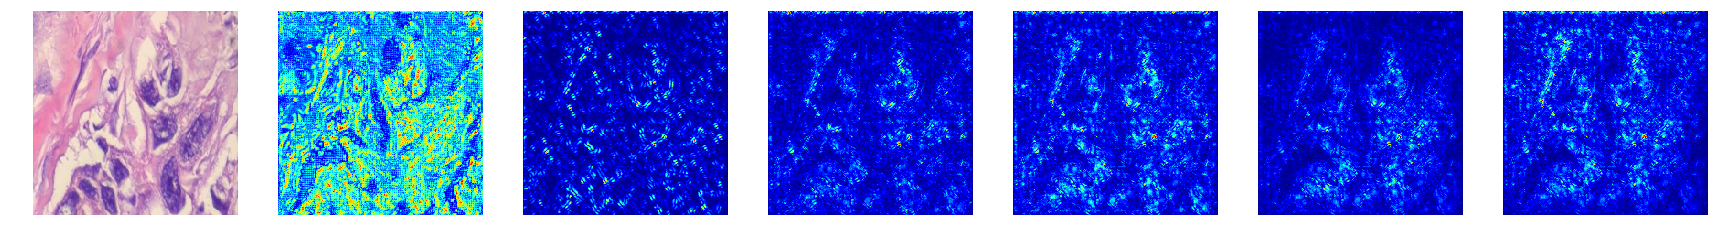

In [111]:
f, ax = plt.subplots(1, 7)
f.set_size_inches(30, 25)
ax[0].imshow(img1, cmap='jet')
ax[0].axis('off')
for i, grad in enumerate(plot_grags[0:6]):
    ax[i+1].imshow(grad, cmap='jet')
    ax[i+1].axis('off')

In [57]:
plot_heat = []
for i,lname in enumerate(layers_name_2):
    layer_idx = utils.find_layer_idx(model, lname)
    grads = visualize_cam(model, layer_idx, filter_indices=None, seed_input=img1)
    plot_heat.append(grads)

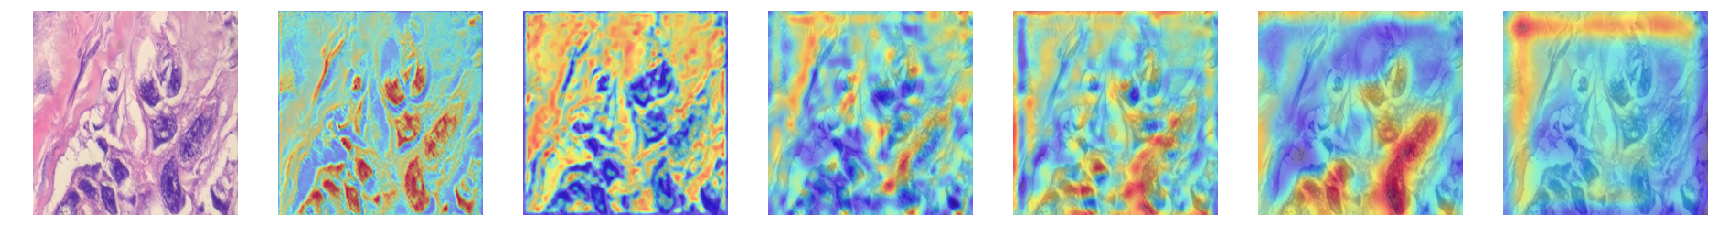

In [110]:
f, ax = plt.subplots(1, 7)
f.set_size_inches(30, 25)
ax[0].imshow(img1, cmap='jet')
ax[0].axis('off')
for i, grad in enumerate(plot_heat[0:6]):
    jet_heatmap = np.uint8(cm.jet(grad)[..., :3] * 255)
    ax[i+1].imshow(overlay(jet_heatmap, img1))
    ax[i+1].axis('off')
#     ax[i+1].set_title(layers_name_2[i])

In [109]:
layer_idx = utils.find_layer_idx(model, "predictions")
grads = visualize_cam(model, layer_idx, filter_indices=None, seed_input=img1)

(-0.5, 223.5, 223.5, -0.5)

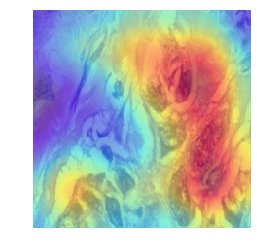

In [69]:
jet_heatmap = np.uint8(cm.jet(grads)[..., :3] * 255)
plt.imshow(overlay(jet_heatmap, img1))
plt.axis("off")

(-0.5, 223.5, 223.5, -0.5)

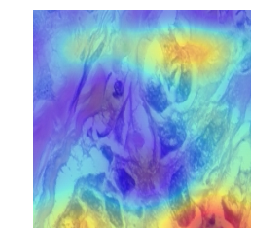

In [108]:
jet_heatmap = np.uint8(cm.jet(grads)[..., :3] * 255)
plt.imshow(overlay(jet_heatmap, img1))
plt.axis("off")

In [105]:
# model.layers[-3].name

In [165]:
layer_idx = 9
grads = visualize_saliency(model, layer_idx, filter_indices=None,seed_input=img1, backprop_modifier="guided")

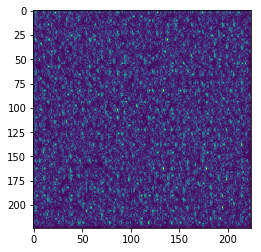

In [166]:
plt.imshow(grads)

In [ ]:
# model.summary()

In [53]:
# penultimate_layer = utils.find_layer_idx(model, 'conv2_block1_1_relu')

In [147]:
grads = visualize_cam(model, layer_idx, filter_indices=None, seed_input=img1)   

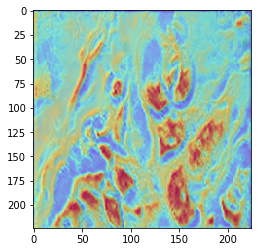

In [148]:
jet_heatmap = np.uint8(cm.jet(grads)[..., :3] * 255)
plt.imshow(overlay(jet_heatmap, img1))

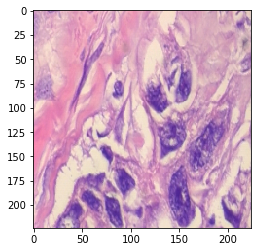

In [140]:
plt.imshow(img1)

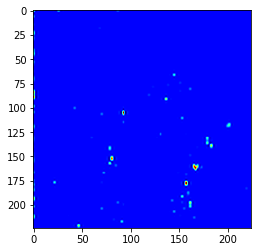

In [146]:
plt.imshow(jet_heatmap)

In [38]:
model.predict(np.array([img1]))

array([[-377.80603,  598.4165 ]], dtype=float32)

## Keract

In [5]:
import keract

In [6]:
model = load_model("../models/dataset-1/vanilla/DenseNet121_224x224/model.hdf5")

In [7]:
df = pd.read_csv("train.csv")
imgs = df[df["label"] == 1]
imgs = imgs[imgs["zoom"] == "400X"]

/home/yannis/.local/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/yannis/.local/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


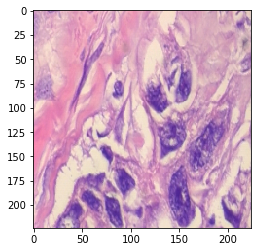

In [8]:
img1 = utils.load_img("data/original/all/"+list(imgs['name'])[15], target_size=(224, 224))
plt.imshow(img1)

In [9]:
image = img1.reshape((1, img1.shape[0], img1.shape[1], img1.shape[2]))

In [10]:
img1 = utils.load_img("data/original/all/"+list(imgs['name'])[15], target_size=(224, 224))

In [11]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
keep = [ m.name for m in model.layers if "relu" in m.name]

In [32]:
activations = keract.get_activations(model, image, layer_name=keep[1])

conv2_block1_0_relu/Relu:0 (1, 56, 56, 64) 


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

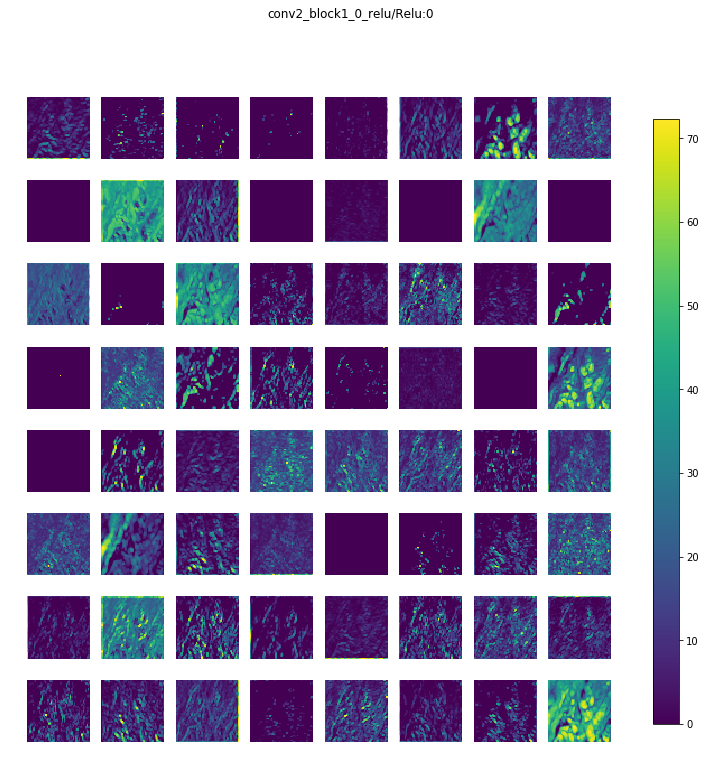

In [33]:
keract.display_activations(activations, img1)

In [13]:
# keract.display_activations(activations)

In [14]:
first = activations.get('conv1/relu/Relu:0')

In [18]:
keract.display_activations(first, img1)

AttributeError: 'numpy.ndarray' object has no attribute 'items'

In [17]:
keract.display_heatmaps(first, img1)

AttributeError: 'numpy.ndarray' object has no attribute 'items'

input_2:0 (224, 224, 3) -> Skipped. First dimension is not 1.
zero_padding2d_1/Pad:0 (1, 230, 230, 3) 


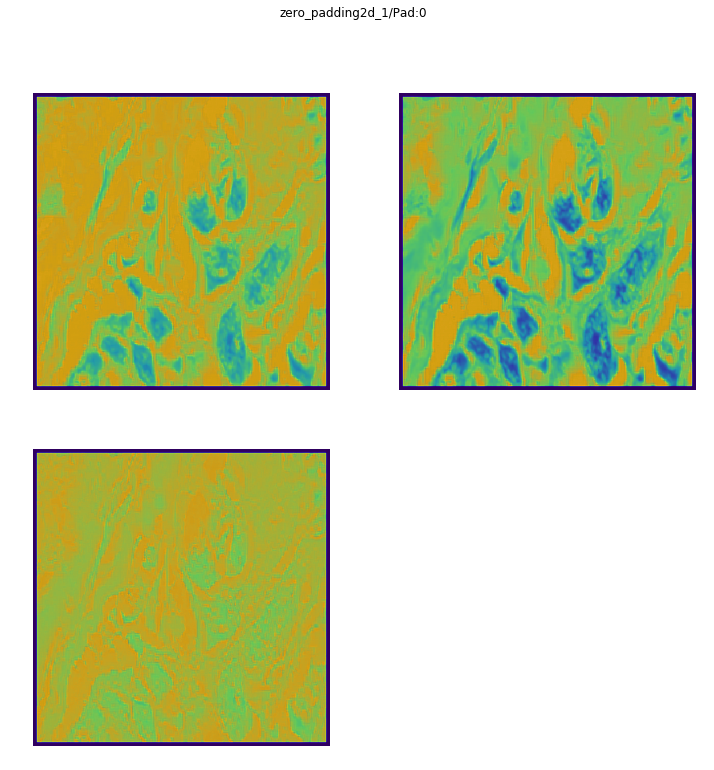

conv1/conv/convolution:0 (1, 112, 112, 64) 


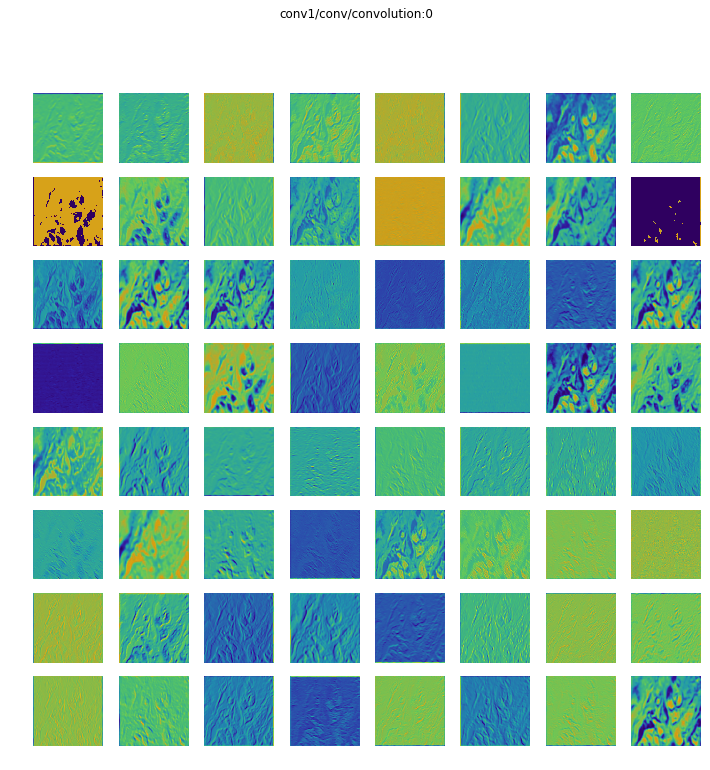

conv1/bn/cond/Merge:0 (1, 112, 112, 64) 


KeyboardInterrupt: 

In [ ]:
keract.display_heatmaps(activations, img1)